To use ROOT within Google Colab, it seems that the best way is currently through Conda (https://docs.conda.io/en/latest/). So, we first install Conda.

In [2]:
!pip install -q condacolab

In [3]:
import condacolab

In [4]:
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...


In [1]:
!conda --version

conda 23.11.0


In [2]:
!conda install ROOT

Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.9.2

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - root


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    afterimage-1.21            |    h28ea39c_1005         676 KB  conda-forge
    anyio-4.6.2.post1          |     pyhd8ed1ab_0         107 KB  conda-forge
    argon2-cffi-23.1.0         |     pyhd8ed1ab_0          18 KB  conda-forge
    argon2-cffi-bindings-21.2.0|  py310ha75aee5_5          34 KB  conda-forge
    arrow-1.3.0                |     pyhd8ed1ab_0          98 KB  conda-forge
    asttokens-2.4.1            |     pyhd8ed1ab_0          28 

In [6]:
import ROOT

# **Ajuste de função com o ROOT**

Pressione Enter para continuar...


''

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      44.7764
NDf                       =           54
Edm                       =  3.53541e-09
NCalls                    =           81
p0                        =      40.7556   +/-   1.66912     
p1                        =    0.0263899   +/-   0.06215     
p2                        =       1.8799   +/-   0.0492635   


Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


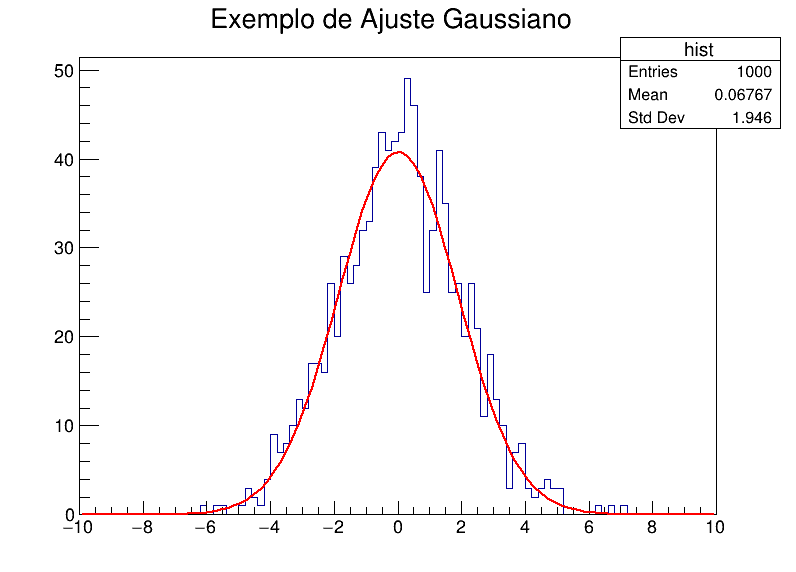

In [7]:


# 1. Crie um histograma e preencha com dados simulados
hist = ROOT.TH1F("hist", "Exemplo de Ajuste Gaussiano", 100, -10, 10)
for i in range(1000):
    hist.Fill(ROOT.gRandom.Gaus(0, 2))  # Dados com distribuição Gaussiana

# 2. Defina a função de ajuste como uma Gaussiana
# A função Gaussiana é definida como: [0]*exp(-0.5*((x-[1])/[2])**2)
# Onde:
# [0] é a amplitude (altura),
# [1] é a média,
# [2] é o desvio padrão (sigma)
fit_func = ROOT.TF1("fit_func", "[0]*exp(-0.5*((x-[1])/[2])**2)", -10, 10)

# 3. Definir os valores iniciais dos parâmetros para o ajuste
fit_func.SetParameters(100, 0, 2)  # Amplitude, média, desvio padrão

# 4. Ajuste a função ao histograma
hist.Fit(fit_func, "R")  # "R" restringe o ajuste ao intervalo da função

# 5. Exibir o histograma e o ajuste
canvas = ROOT.TCanvas("canvas", "Ajuste Gaussiano", 800, 600)
hist.Draw()
fit_func.Draw("same")  # Desenhe a função ajustada na mesma janela
canvas.Update()

# Manter a janela aberta (apenas se rodando como um script)
input("Pressione Enter para continuar...")


# **Atividade: Lendo um arquivo root**

Carregue o arquivo "Inv_mass_exemplo_INCT_dia2.root" no botão da esquerda (pasta)  --> "fazer upload para o armazenamento da sessão"

NO código abaixo, abra o arquivo "Inv_mass_exemplo_INCT_dia2.root"

Acesse o histograma "ULS"

Plote o histograma

Identifique a forma do pico e do fundo e ajuste as funções que os descrevem



Nome do histograma: h0b
Número de bins: 375
Contagem no primeiro bin: 4611.0
TFile**		Inv_mass_exemplo_INCT_dia2.root	
 TFile*		Inv_mass_exemplo_INCT_dia2.root	
  OBJ: TH1D	h0b	8.0 #leq p_{T} < 15.0 (GeV/c) : 0 at: 0x5ab23305d6d0
  KEY: TH1D	ULS;1	8.0 #leq p_{T} < 15.0 (GeV/c)
  KEY: TH1D	LS;1	Inv.Mass Pair_ev1+_ev1+


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


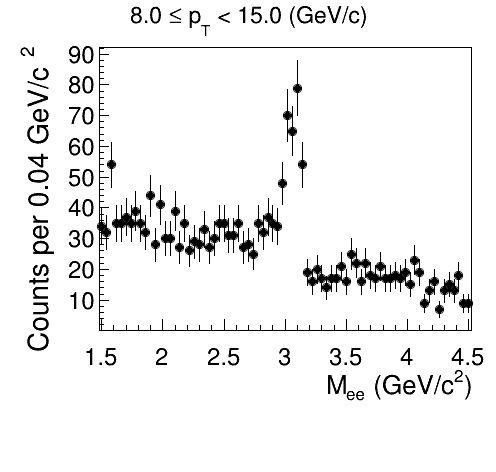

In [10]:
import ROOT

# Abra o arquivo ROOT
file = ROOT.TFile.Open("Inv_mass_exemplo_INCT_dia2.root")

# Acesse o histograma TH1D dentro do arquivo
hist = file.Get("ULS")

file.ls()

if not isinstance(hist, ROOT.TH1D):
    print("O objeto não é um histograma TH1D.")

# Verifique se o histograma foi carregado corretamente
if hist:
    # Imprimir algumas informações sobre o histograma
    print("Nome do histograma:", hist.GetName())
    print("Número de bins:", hist.GetNbinsX())
    print("Contagem no primeiro bin:", hist.GetBinContent(1))

    canvas = ROOT.TCanvas("canvas", "Histograma", 500, 500)
    canvas.SetLeftMargin(0.2)   # Aumentar a margem esquerda para o título do eixo Y
    canvas.SetRightMargin(0.05)  # Margem direita menor (opcional)
    canvas.SetTopMargin(0.1)     # Margem superior (ajustar para dar espaço ao título)
    canvas.SetBottomMargin(0.3) # Aumentar a margem inferior para o título do eixo X


    hist.Draw()

    canvas.Update()

else:
    print("Histograma não encontrado.")






In [ ]:
# Fecha arquivo
file.Close()